In [1]:
import gradio as gr

from fastai.vision.all import load_learner

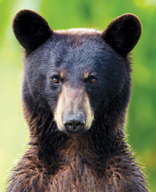

In [33]:
%%script false
from fastai.vision.all import PILImage
im = PILImage.create('black.jpg')
im.thumbnail((192, 192))
im

In [4]:
learner = load_learner("export.pkl")

In [46]:
categories = ["black", "grizzly", "teddy"]
def image_classifier(img):
    pred, idx, probs = learner.predict(img)
    return dict(zip(categories, map(float, probs)))


In [47]:
%%script false
image_classifier(im)

{'black': 0.8764044642448425,
 'grizzly': 0.1182260662317276,
 'teddy': 0.005369444377720356}

In [48]:
intf = gr.Interface(fn=image_classifier, inputs="image", outputs="label", examples=["black.jpg", "grizzly.jpg", "teddy.jpg"])
intf.launch()

Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.


## Export

In [ ]:
%%script false
!jupyter nbconvert --to script app.ipynb